<a href="https://colab.research.google.com/github/jugernaut/Numerico2021/blob/desarrollo/06_DerivadaNumerica/01_AproximacionDerivada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>Aproximación Derivada</i></h1>
  </font>
  <font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>Profesor: M.en.C. Miguel Angel Pérez León.</i></h5>
    <h5 align="center"><i>Ayudante: Jesús Iván Coss Calderón.</i></h5>
  <h5 align="center"><i>Materia: Análisis Numérico.</i></h5>
  </font>

# Introducción

Si revisamos con cuidado, algunas definiciones matemáticas utilizan un tipo de figura literaria conocida como <a href=https://es.wikipedia.org/wiki/Ox%C3%ADmoron>*oxímoron*</a>. En términos simples, un oxímoron consiste en usar dos conceptos de significado opuesto y con ello generar un tercer concepto. 

Por ejemplo: **La razón de cambio instantáneo**. 
- Cuando se habla de un *cambio*, se requiere de la comparación entre dos o más estados y con ello analizar las diferencias entre un estado y otro; 
- por otro lado, la palabra *instantáneo* tiene que ver con algo que dura un instante, es decir un tiempo puntal. 

Entonces el concepto "**cambio instantáneo**" representa un oxímoron. Pero ¿cuál es su significado?
¿Será importante este concepto en nuestra vida diaria?

En lo que sigue veremos que la razón de cambio instantáneo tiene que ver con un concepto muy importante en Cálculo: *la derivada*.

## Ejemplo

Un estudiante de lenguas participará en un concurso internacional cuyo principal reto es el conocimiento del vocabulario de un cierto idioma. Por ello, es importante que el estudiante utilice un método de estudio adecuado para recordar el significado del mayor número de palabras posible.

La <a href=https://es.wikipedia.org/wiki/Curva_del_olvido>curva del olvido</a> puede ayudar al estudiante a generar un plan de estudio adecuado. La función que define esta curva es la siguiente:

$$
R(t) = e^{-t/S}
$$

donde $R$ es cuanto recordamos, $S$ es la intensidad del recuerdo y $t$ el tiempo. Podemos definir $S \in (0,1]$, donde $1$ es la máxima intensidad de recuerdo y un valor cercano a $0$ corresponde a algo que no nos interesa nada.

**Observación**: $S$ no puede ser exactamente $0$ por que en ese caso la función $R(t)$ no está definida.

La siguiente gráfica muestra cómo decrecen nuestros recuerdos con el paso del tiempo.

Cloning into 'Numerico2021'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 2945 (delta 32), reused 0 (delta 0), pack-reused 2871
Receiving objects: 100% (2945/2945), 12.98 MiB | 1.44 MiB/s, done.
Resolving deltas: 100% (1867/1867), done.


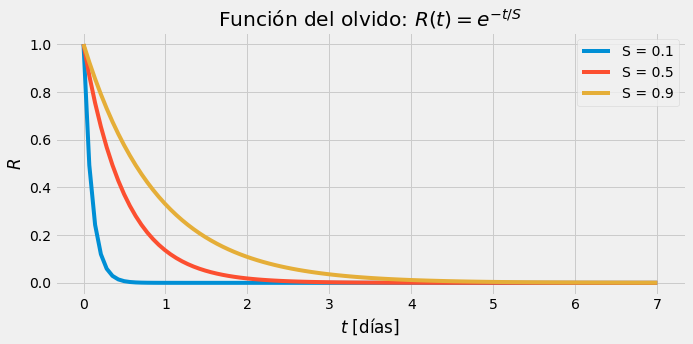

In [ ]:
!git clone https://github.com/jugernaut/Numerico2021.git
import Numerico2021.Utils.gutils as vis
import numpy as np
import pandas as pd

t = np.linspace(0, 7, 100)    # Codominio de la función, de 0 a 7 con 100 puntos
R = lambda t, S: np.exp(-t/S) # Definición de la función del olvido

# Definimos algunos parámetros para la gráfica
par = [{'title':'Función del olvido: $R(t) = e^{-t/S}$', 
        'xlabel':'$t$ [días]',
        'ylabel':'$R$'}
      ]

# Inicializamos el plano Cartesiano
graf = vis.planoCartesiano(par=par)

# Realizamos tres gráficas para S=0.1, S=0.5 y S=0.9] de la curva del olvido
for S in [0.1, 0.5, 0.9]:
    graf.plot(x= t, y= R(t, S), par={'label':'S = {}'.format(S)})

# Mostramos la leyenda de las gráficas
graf.legend()
graf.show()

¿Será posible determinar cada cuanto tiempo el estudiante debe repasar las palabras para que no las olvide y pueda ganar el concurso? ¿De qué depende esto?

Tomemos por ejemplo el caso de $S=0.9$ (curva naranja). ¿En qué parte de la gráfica el descenso es más rápido?, en otras palabras, ¿en qué parte de la gráfica el olvido se incrementa?,Para conocer ese descenso, debemos calcular la pendiente y eso lo podemos hacer con la siguiente fórmula:

$$
m = \frac{R(t_2) - R(t_1)}{t_2 - t_1}
$$

Como es obvio, este valor de la pendiente cambiará cuando $t_1$ y $t_2$ cambien. 

Definamos entonces $h = t_2 - t_1$ y $t = t_1$. 

Con ello podemos escribir:

$$
m(t) = \frac{R(t + h) - R(t)}{h}
$$

En esta última fórmula vemos que la pendiente depende de $t$.

Vamos a calcular $m$ para $h = 1$ y $t = [0,1,2,3,4,5,6]$:

In [ ]:
# Vamos a trabajar con el siguiente valor de S
S = 0.9
h = 1.0
td = np.arange(0,8,h) # Definición de las t = 0,1,2,...,6
m = np.zeros(len(td)) # Arreglo para almacenar las pendientes

# Calculamos la pendiente usando la fórmula antes descrita
for i,x in enumerate(td):
    m[i] = (R(x + h, S) - R(x, S)) / h

# Ponemos la información en un DataFrame y la mostramos
tabla = pd.DataFrame(np.array([td, m, ]).T, columns = ['t', 'm(t)'])
tabla

,t,m(t)
0,0.0,-0.670807
1,1.0,-0.220825
2,2.0,-0.072694
3,3.0,-0.023930
4,4.0,-0.007878
5,5.0,-0.002593
6,6.0,-0.000854
7,7.0,-0.000281


Observamos que la pendiente es negativa, lo cual indica un decrecimiento. También, la magnitud de la pendiente (su valor absoluto) disminuye conforme $t$ se incrementa.

¿Será posible calcular **la razón de cambio instantáneo**? Para ello, esta razón debería calcularse en un solo instante de tiempo, lo cual implica que $t_1 = t_2 \Longrightarrow h = 0$, y esto nos lleva a que la fórmula de $m(t)$ no está bien definida (división por cero!). Pero, ¿qué pasa si $h$ se hace muy pequeña? es decir:

$$
\lim_{h \to 0}  \frac{R(t + h) - R(t)}{h}
$$

En la siguiente visualización puedes modificar $S$, $h$ y $t$. Observa lo que sucede cuando $h \to 0$.

In [ ]:
# Google Colab
%run "/content/Numerico2021/06_DerivadaNumerica/Derivadas_interactive.ipynb"

interactive(children=(FloatSlider(value=0.9, description='S', max=0.9, min=0.1, step=0.2), FloatSlider(value=1…

<function __main__.razonDeCambio>

# Derivada

Dado que ya se conoce la forma en la cual se pueden generar polinomios que interpolen un conjunto de datos, el siguiente paso es dar una aproximación a la derivada (o derivadas) en los mismo puntos

Al igual que el resto de los temas vistos en el curso, encontrar una aproximación de la derivada de una función tiene muchos usos en áreas como, computo científico, física, economía e ingeniería. 

## Definición formal

Recordemos la definición de derivada de $f\left(x\right)$ 

$$f'(x)=\lim_{h\rightarrow0}\frac{f\left(x+h\right)-f\left(x\right)}{h}$$

Ahora si nos tomamos un punto $x_{0}$ y evaluamos la derivada, tenemos 

$$f'(x_{0})=\lim_{h\rightarrow0}\frac{f\left(x_{0}+h\right)-f\left(x_{0}\right)}{h}$$

Esta definición indica una manera obvia de generar una aproximación de $f'\left(x\right)$; es decir basta calcular

$$\frac{f\left(x_{0}+h\right)-f\left(x_{0}\right)}{h}$$

En algunas definiciones, se remplaza $h$ por $\triangle$.

$$f'\left(x\right)=\lim_{\triangle x\rightarrow0}\frac{f\left(x+\triangle x\right)-f\left(x\right)}{\triangle x}$$

Veamos una primera aproximación numérica de la derivada basada en la definició formal.

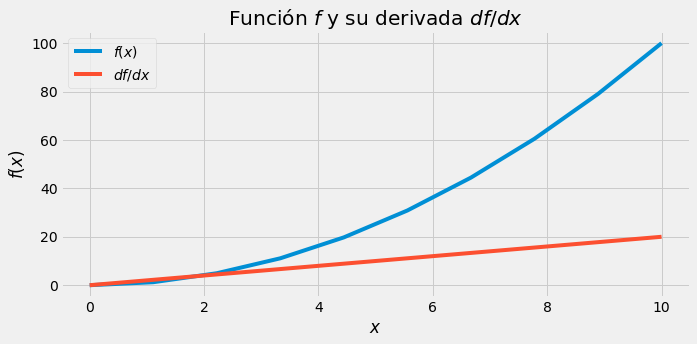

In [ ]:
# funcion de la cual se dara una aproximacion
def f(x):
  return x*x

# primera aproximacion de la derivada numerica
# f: funcion a derivar
# x: punto en el cual se aproxima la derivada
# delta: incremento (o decremento) muy pequeño
def derivada(f, x, delta):
  return (f(x+delta)-f(x))/(delta)

x = np.linspace(0, 10, 10)
y0 = f(x)
y1 = derivada(f, x, 0.0001)

# Definimos algunos parámetros para la gráfica
par = [{'title':'Función $f$ y su derivada $df/dx$', 
        'xlabel':'$x$',
        'ylabel':'$f(x)$'}
      ]

# Inicializamos el plano Cartesiano
graf = vis.planoCartesiano(par=par)

# Grafica de ambas funciones
graf.plot(x=x, y=y0, par={'label':'$f(x)$'})
graf.plot(x=x, y=y1, par={'label':'$df/dx$'})

# Mostramos la leyenda de las gráficas
graf.legend()

## Limitantes

La definición previa es útil cuando se toman valores de $h$ muy pequeños y aunque no parezca evidente, esta definición no es muy útil debido al ya bien conocido enemigo del curso, **el error de redondeo**.

De tal manera que se tienen que encontrar mejores formas para calcular las derivadas de $f\left(x\right)$.

# Derivadas parciales

Ya que conocemos una primera aproximación de la derivada de una funcion de una sola variable, es fácil extender este concepto a funciones de varias variables (cálculo vectorial).

## Definición formal

Sea $F(X)$ una función de de dos variables $x_1,x_2$, se define la derivada parcial de $F$ respecto a la variable $x$ de la siguiente manera.

$$\frac{\delta F}{\delta x_1}=\lim_{\triangle x_1\rightarrow0}\frac{F\left(x_1+\triangle x_1,x_2\right)-F\left(x_1,x_2\right)}{\triangle x_1}$$

Y de manera analoga, se define la derivada parcial de $F$ respecto a la variable $y$

$$\frac{\delta F}{\delta x_2}=\lim_{\triangle x_2\rightarrow0}\frac{F\left(x_1,x_2+\triangle x_2\right)-F\left(x_1,x_2\right)}{\triangle x_2}$$

Ahora, supongamos que $F$ es una función de de $n$ variables, entonces la derivada parcial de $F$ respecto a la i-esima variable se define de la siguiente manera.

$$\frac{\delta F}{\delta x_{i}}=\lim_{\triangle x_{i}\rightarrow0}\frac{F\left(x_{1},x_{2},x_{3},\ldots,x_{i}+\triangle x_{i},\ldots,x_{n}\right)-F\left(x_{1},x_{2},x_{3},\ldots x_{n}\right)}{\triangle x_{i}}$$

La definición anterior, es la forma más general de la derivada parcial de una función $F$, gracias a las propiedades del lenguaje python, programar esta definición es sumamente sencillo.

Veamos que sucede con la gráfica de la derivadas parciales de $F$ respecto a la variable $x$, donde

$$F(x,y)=x^{2}+y-1$$

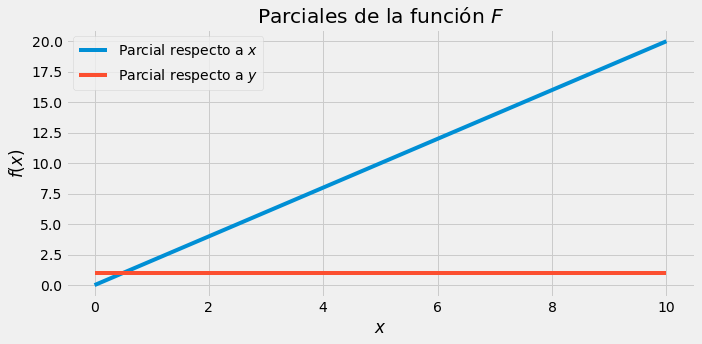

In [ ]:
'''
Devuelve la parcial de F en el
punto X respecto a la variable 
var con una precision delta
F:     funcion vectorial
X:     punto en forma de lista
var:   variable para la parcial
delta: cambio en var
'''
def parcial(F, X, var, delta):
    Xmas = X.copy()
    Xmas[var] = X[var]+delta
    return (F(Xmas)-F(X))/delta

def F(X):
    return (X[0]**2) + X[1]-1

puntos = np.linspace(0, 10, 10)
parx = parcial(F,[puntos,puntos], 0, 0.0001)
pary = parcial(F,[puntos,puntos], 1, 0.0001)

# Definimos algunos parámetros para la gráfica
par = [{'title':'Parciales de la función $F$', 
        'xlabel':'$x$',
        'ylabel':'$f(x)$'}
      ]

# Inicializamos el plano Cartesiano
graf = vis.planoCartesiano(par=par)

# Grafica de ambas funciones
graf.plot(x=puntos, y=parx, par={'label':'Parcial respecto a $x$'})
graf.plot(x=puntos, y=pary, par={'label':'Parcial respecto a $y$'})

# Mostramos la leyenda de las gráficas
graf.legend()

# Referencias

*   Repositorio prometeo proyecto PAPIME U.N.A.M, jupyter [Derivadas](https://colab.research.google.com/github/jugernaut/Prometeo/blob/master/01_Calculo/04_Derivadas/01_Derivadas.ipynb).
*   Riswan Butt, Numerical Analysys Using Matlab, Jones and Bartlett.
*   Ward Cheney, David Kincaid, Métodos Numéricos y Computación, Cenage Learning.
*   Richard L. Burden, J. Douglas Faires, Análisis Numérico, Math Learning.
*   Yuri N. Skiba, Introducción a los Métodos Numéricos.